In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Generating mock data...


C:\Users\opsb2\AppData\Local\Temp\ipykernel_18424\1497424153.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='issue_category', data=df, order=df['issue_category'].value_counts().index, palette='viridis')


Dashboard saved as 'QA_Report_Dashboard.png'


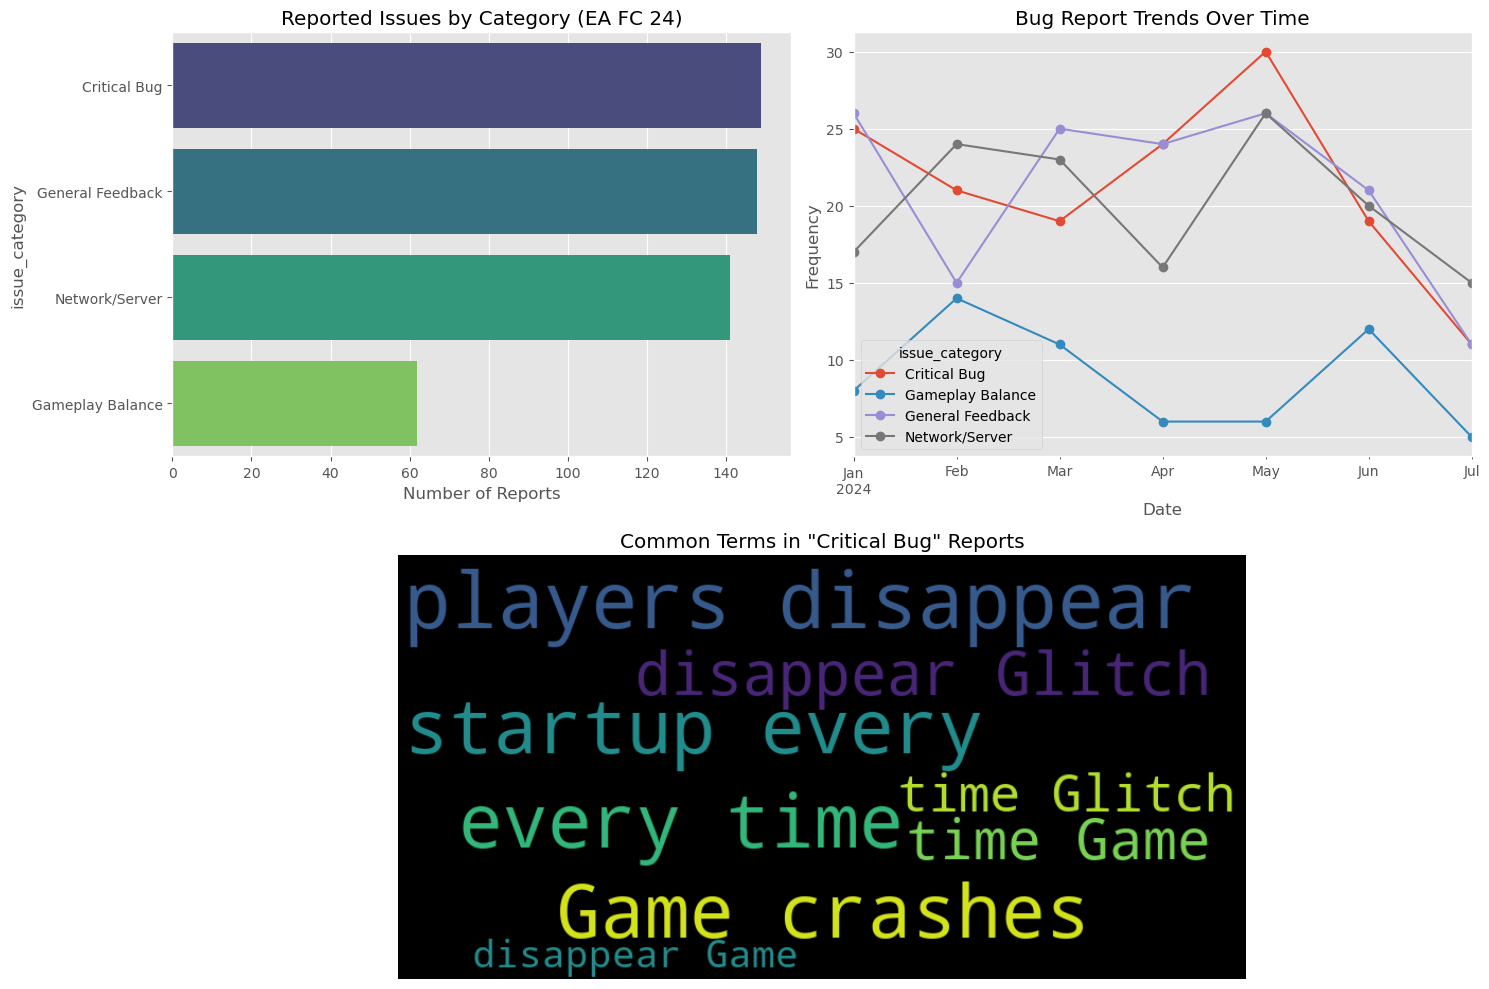

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# --- CONFIGURATION ---
# If you download the Kaggle dataset, set this to True and ensure the filename matches
USE_REAL_DATA = False 
DATA_FILE = 'EAsports_FC24_Steam_Reviews.csv'

def generate_mock_data():
    """Generates realistic dummy data for the project demonstration."""
    print("Generating mock data...")
    dates = pd.date_range(start='2024-01-01', periods=200)
    reviews = []
    
    # Mock templates mimicking real gamer feedback
    templates = [
        ("Game crashes on startup every time.", "Bug"),
        ("Love the graphics but the servers are terrible.", "Server"),
        ("Fix the goalkeeper AI, it's broken.", "Gameplay"),
        ("Best football game ever!", "Praise"),
        ("Too many microtransactions.", "Monetization"),
        ("Lag is unplayable in Champions.", "Server"),
        ("Glitch where players disappear.", "Bug")
    ]
    
    data = []
    for _ in range(500):
        date = np.random.choice(dates)
        template, category = templates[np.random.randint(len(templates))]
        # Add some randomness to text
        text = f"{template} {np.random.randint(1, 100)}"
        data.append({'date': date, 'review': text})
        
    return pd.DataFrame(data)

# --- 1. DATA LOADING ---
if USE_REAL_DATA:
    try:
        df = pd.read_csv(DATA_FILE)
        # Standardize column names if using real Kaggle data
        # Assuming Kaggle data has 'review_text' or similar. Adjust as needed.
        # For this script, we'll assume a column 'review' exists or rename the text column
        print("Loaded real data.")
    except FileNotFoundError:
        print("File not found. Falling back to mock data.")
        df = generate_mock_data()
else:
    df = generate_mock_data()

# Ensure date format
df['date'] = pd.to_datetime(df['date'])

# --- 2. "AI" CATEGORIZATION (Keyword Search) ---
# In a real role, you would explain that this section could be replaced 
# with an LLM (like GPT-4) call for higher accuracy.
def classify_issue(text):
    text = str(text).lower()
    if any(x in text for x in ['crash', 'freeze', 'close', 'stuck', 'glitch']):
        return 'Critical Bug'
    elif any(x in text for x in ['server', 'lag', 'disconnect', 'ping', 'connection']):
        return 'Network/Server'
    elif any(x in text for x in ['ai', 'balance', 'nerf', 'buff', 'meta']):
        return 'Gameplay Balance'
    elif any(x in text for x in ['money', 'pay', 'shop', 'points']):
        return 'Monetization'
    else:
        return 'General Feedback'

df['issue_category'] = df['review'].apply(classify_issue)

# --- 3. VISUALIZATION REPORT ---
plt.figure(figsize=(15, 10))
plt.style.use('ggplot')

# Chart 1: Issue Distribution
plt.subplot(2, 2, 1)
sns.countplot(y='issue_category', data=df, order=df['issue_category'].value_counts().index, palette='viridis')
plt.title('Reported Issues by Category (EA FC 24)')
plt.xlabel('Number of Reports')

# Chart 2: Issues Over Time (Trend Analysis)
plt.subplot(2, 2, 2)
# Group by Month-Year for cleaner trend line
monthly_issues = df.groupby([df['date'].dt.to_period('M'), 'issue_category']).size().unstack().fillna(0)
monthly_issues.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Bug Report Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Chart 3: Word Cloud of "Critical Bugs"
plt.subplot(2, 1, 2)
bug_text = ' '.join(df[df['issue_category'] == 'Critical Bug']['review'].astype(str))
if bug_text:
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(bug_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common Terms in "Critical Bug" Reports')
else:
    plt.text(0.5, 0.5, 'No Critical Bugs Found', ha='center')

plt.tight_layout()
plt.savefig('QA_Report_Dashboard.png')
print("Dashboard saved as 'QA_Report_Dashboard.png'")
plt.show()